In [1]:
#Python Version
import sys
assert sys.version_info >=(3,5)

In [2]:
# Scikit-Learn version check >=0.2
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
print('hello world')

hello world


In [4]:
HOUSING_PATH='datasets/housing/housing.csv'

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()
#count : how many data is here


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing["ocean_proximity"].value_counts()
#value_counts is used for checking the list value

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

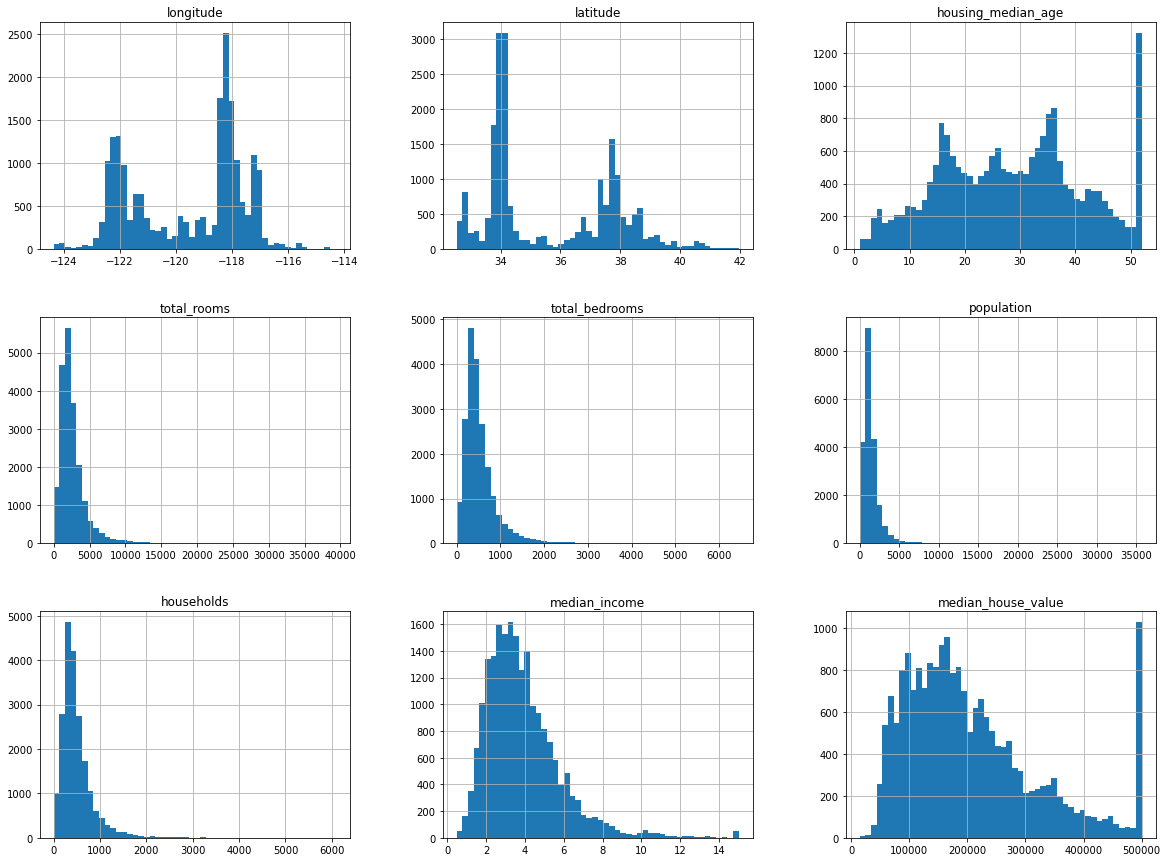

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# distribution have to be more gaussiantic
# data's unit is also different

# Target value is 'housing_median_age'

In [10]:
# 노트북의 실행결과가 동일하도록
import numpy as np
np.random.seed(42)

In [11]:
#import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    # np.random.permutation -> 배열을 입력하면 배열을 섞어준다.
    test_set_size = int(len(data)*test_ratio)

    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    #iloc : Indexing Method
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
#np.random.permutation(10)

In [13]:
train_set, test_set = split_train_test(housing,0.2) # split into 80% and 20%
print(len(train_set), len(test_set))

16512 4128


In [14]:
from zlib import crc32
#Check Sum
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio* 2**32
#crc32 ->  


#Pandas DAta Frame 에서 ID 컬럼만 뽑아서 lambda 함수를 적용한다.
# Test Ratio 
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    int_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# first version : return hash(np.int64(identifier)).digest()[-1]<256 * test_ratio

In [15]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

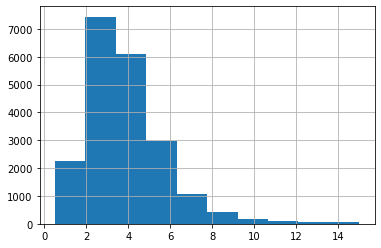

In [17]:
housing["median_income"].hist()
#

In [18]:
# * 편향된 데이터를 pandas cut을 이용해서 Label로 변환 
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0,1.5,3.0,4.5,6,np.inf],
                              labels=[1,2,3,4,5]) # Label값으로 변환

<AxesSubplot:>

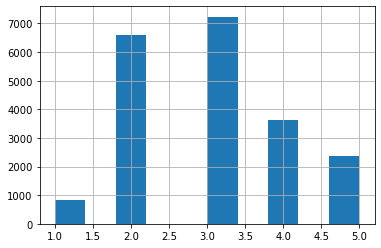

In [19]:
housing["income_cat"].hist()#편향된 그래프를 Label화해서 변환

In [20]:
# Label 화된 데이터 갯수 확인.
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit #범주형 데이터를 고르게 분할

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
i=0

for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    print(train_index)
    print(test_index)
    i=i+1
    print(i)

[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]
1


In [22]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
st_train_set, st_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])
#stratify 에 housing의 income_cat을 지정해줌으로써,위와 같은 방식으로 나누어준다..


In [25]:
st_train_set["income_cat"].value_counts()/len(st_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() /len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall":income_cat_proportions(housing),
    "Stratified":income_cat_proportions(strat_test_set),
    "Random":income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100*compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100*compare_props["Random"] / compare_props["Overall"] - 100

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,0.973236
2,0.318847,0.318798,0.324370,1.732260,1.732260
3,0.350581,0.350533,0.358527,2.266446,2.266446
4,0.176308,0.176357,0.167393,-5.056334,-5.056334
5,0.114438,0.114583,0.109496,-4.318374,-4.318374


# 데이터의 이해를 위한 탐색과 시각화

In [28]:
housing = strat_train_set.copy()

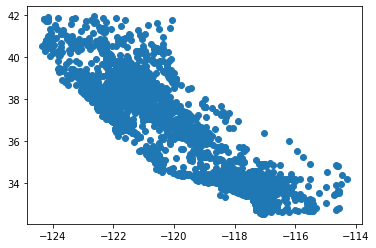

In [29]:
#housing.plot(kind="scatter",x="longitude",y="latitude")
#housing.plot.scatter(x="longitude",y="latitude")
plt.scatter(housing["longitude"],housing["latitude"])


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

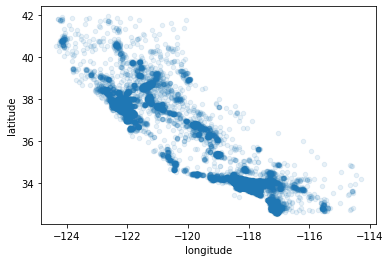

In [30]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

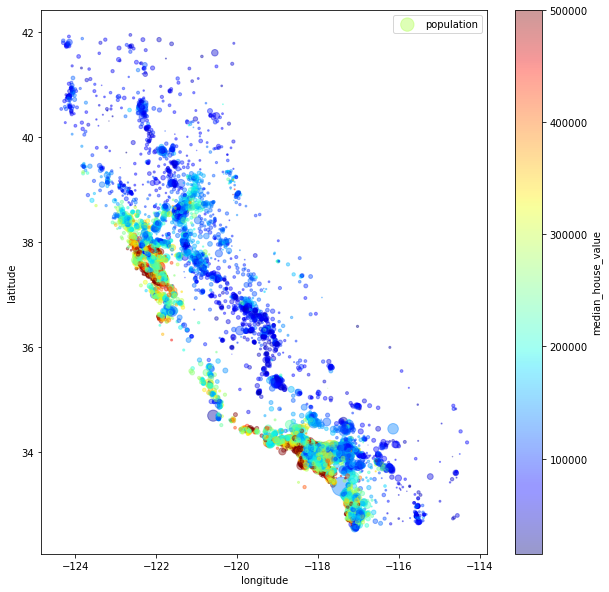

In [31]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100, label="population",figsize=(10,10),
            c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
            sharex=False)
#pandas 에는 sharex에 대한 bug is exist
plt.legend()

In [32]:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
#import pandas as pd
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

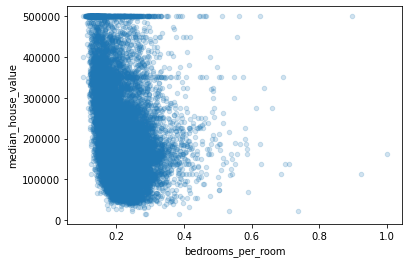

In [34]:
housing.plot(kind="scatter",x="bedrooms_per_room",y="median_house_value",
            alpha=0.2)
plt.show()

In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신러닝 알고리즘 활용을 위한 데이터 준비

## Null을 지우는 방법

In [36]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [37]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
#Null 이 하나라도 있는 열은 추출해서 보여주기 위함.
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [38]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # 옵션1
#subset 기준으로 dropna를 시행

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [39]:
sample_incomplete_rows.drop("total_bedrooms",axis=1) #옵션2
#axis=1 인 경우 column을 삭제

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3


## Null을 채우는 방법

In [40]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)#옵션3

In [41]:
sample_incomplete_rows
#433으로 채워짐

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [42]:
#scikit learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # mean, most_frequent, constant(fill_value)

In [43]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)#Imputer쓰는법

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_
#특성값 보는 법 433이 그것...

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [45]:
housing_num.median().values

/private/var/mobile/Containers/Data/Application/278E2027-AB60-429E-9BE6-528AA3E889DF/tmp/ipykernel_3111/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

### 훈련세트를 변환

In [46]:
X = imputer.transform(housing_num)

In [47]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [48]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


In [49]:
X.size

148608

### 이제 범주형 입력 특성인 ocean_proximity를 전처리합니다.

In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [51]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
#ordinal 데이터는 정수형 데이터로 바꿔준다.(순서)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [52]:
ordinal_encoder.categories_
#해당 순서대로 정수로 바뀜

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### OneHotEncoder

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

#열인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6


class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True): # *args 또는 **kargs가 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        #추가 시키는 작업
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            #numpy 의 c_ 명령어는 배열을 합치는 목적
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_household]
        
attr_adder= CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [57]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index
)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.50581,3.047847


### 수치형 특성을 전처리하기 위해 파이프라인을 만든다.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombineAttributesAdder()),
    ('std_scaler',StandardScaler()),
    #거리 계산에 에러가 발행할 수 있음. 따라서 Scale을 맞춰줘야함.
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
#한 번에 처리하는 느낌인가?

In [59]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [60]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [61]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [62]:
housing_prepared.shape

(16512, 17)

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

#수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### 하나의 큰 파이프라인에 이들을 모두 결합하여 수치형과 범주형 특성을 전처리합니다.

In [64]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
    ('selector',OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [65]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

In [66]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [67]:
np.allclose(housing_prepared, old_housing_prepared)

True

# 모델 선택과 훈련

In [68]:
from sklearn.linear_model import LinearRegression
#labels는 median house value값 관련됨.

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [69]:
housing_prepared
# from pipeline

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [71]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3


In [72]:
#훈련 샘플 몇 개를 사용해 전체 파이프라인을 본다.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Pred : ", lin_reg.predict(some_data_prepared))

Pred :  [203584. 326288. 204152.  58680. 194256.]


In [74]:
from sklearn.metrics import mean_squared_error
# RMS : Root Mean Square
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.72625957642

In [76]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print("MAE : ",lin_mae);

# 1- (Target - Pred)^2/(Target - TargetAverage)^2
print("lin_reg.score",lin_reg.score(housing_prepared, housing_labels))
# 0.65인걸 보니 과소 적합된듯


MAE :  49508.86391715116
lin_reg.score 0.6507362123539984


In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("tree_rmse : ",tree_rmse)

print("tree_reg.score : ",tree_reg.score(housing_prepared,housing_labels))

tree_rmse :  0.0
tree_reg.score :  1.0


# 모델 세부 튜닝

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
#음수를 하는 이유:
# sklearn은 점수가 높을수록 좋은 값이라는 철학?
tree_rmse_scores=np.sqrt(-scores)
tree_rmse_scores

array([70274.7991723 , 67258.3624668 , 71350.42593227, 68882.91340979,
       70987.99296566, 74177.52037059, 70788.57311306, 70850.53018019,
       76430.62239321, 70212.6471067 ])

In [81]:
def display_scores(scores):
    print("점수 : ",scores)
    print("평균 : ",scores.mean())
    print("표준 편차 : ",scores.std())
    
display_scores(tree_rmse_scores)

점수 :  [70274.7991723  67258.3624668  71350.42593227 68882.91340979
 70987.99296566 74177.52037059 70788.57311306 70850.53018019
 76430.62239321 70212.6471067 ]
평균 :  71121.4387110585
표준 편차 :  2434.3080046605132


In [85]:
# 2. linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

점수 :  [66768.62002842 72424.97134486 69423.80452264 66255.39637353
 69520.43705041]
평균 :  68878.64586397319
표준 편차 :  2218.9711680101236


In [86]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
# 결정트리 100개를 만들어서 훈련한 다음에 Ensemble에서 처리
# 중복을 허용한 Sampling도 한다..?


RandomForestRegressor(random_state=42)

In [88]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)

forest_rmse

18626.45217719628

In [90]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error",cv=10)

forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 :  [49633.454487   47565.18736589 50034.52343496 52444.25008076
 49463.18392461 53515.10766804 48577.59023701 47678.90315126
 53433.75372939 49947.64462367]
평균 :  50229.359870258486
표준 편차 :  2082.3174179664184


In [92]:
scores = cross_val_score(lin_reg,housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68830.763064
std       2812.126821
min      64776.193303
25%      67078.049782
50%      67701.120136
75%      70950.369372
max      74200.130902
dtype: float64

In [94]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

106874.50415237377

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
]